In [9]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 404.9 kB/s eta 0:00:00a 0:00:01


Training Dataset Shape: (74681, 4)
Validation Dataset Shape: (999, 4)

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Validation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                        

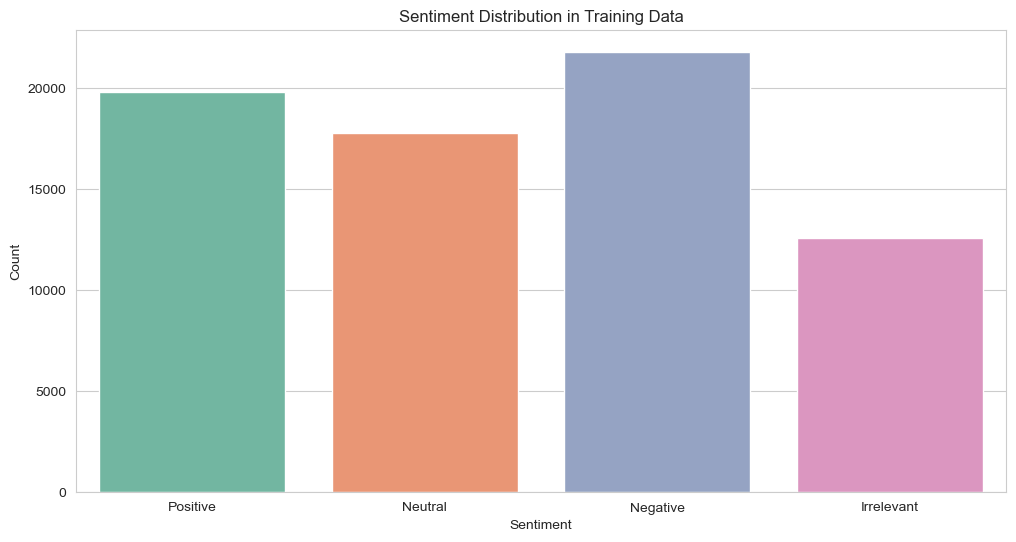

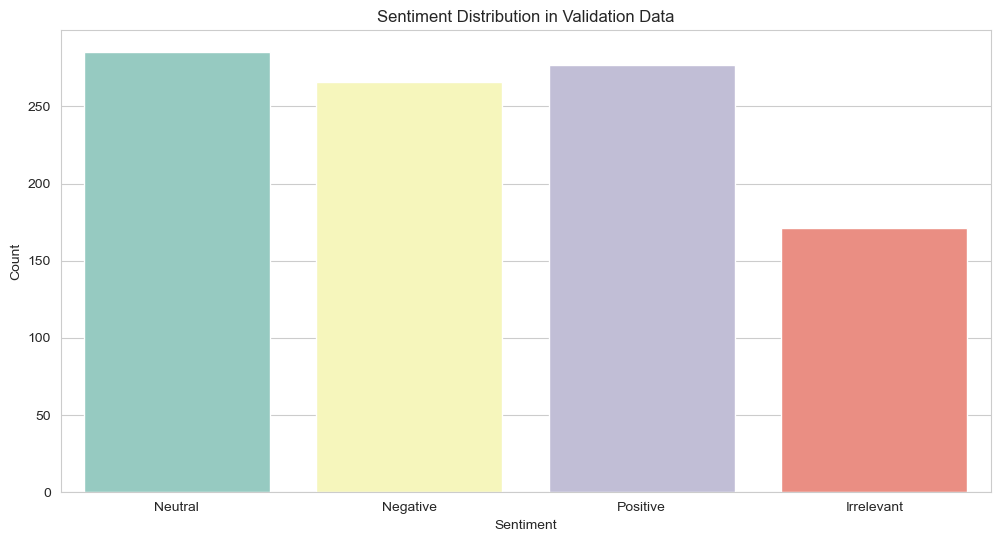

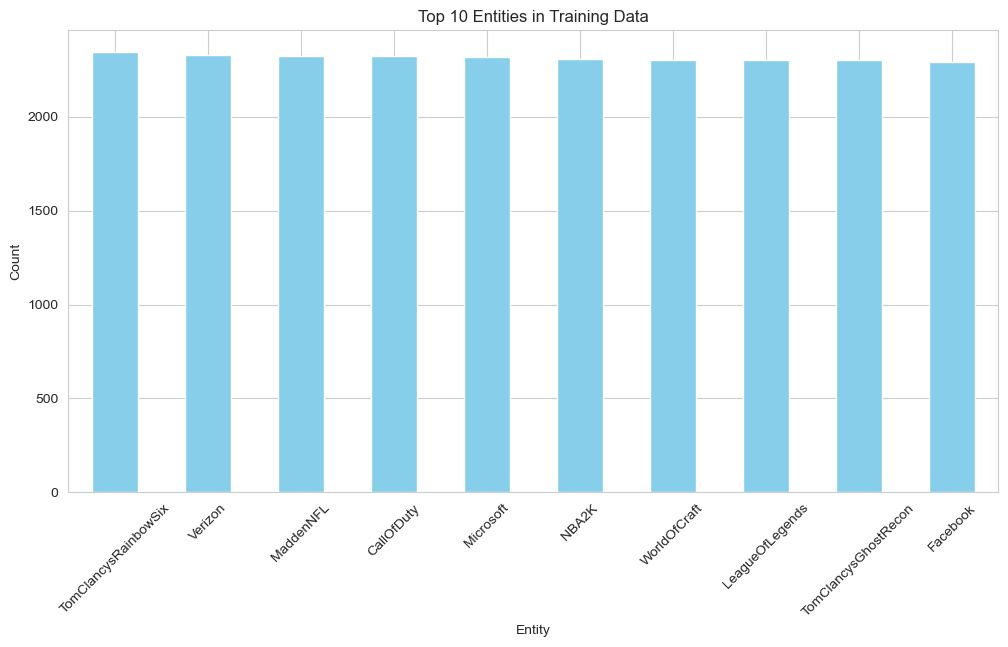

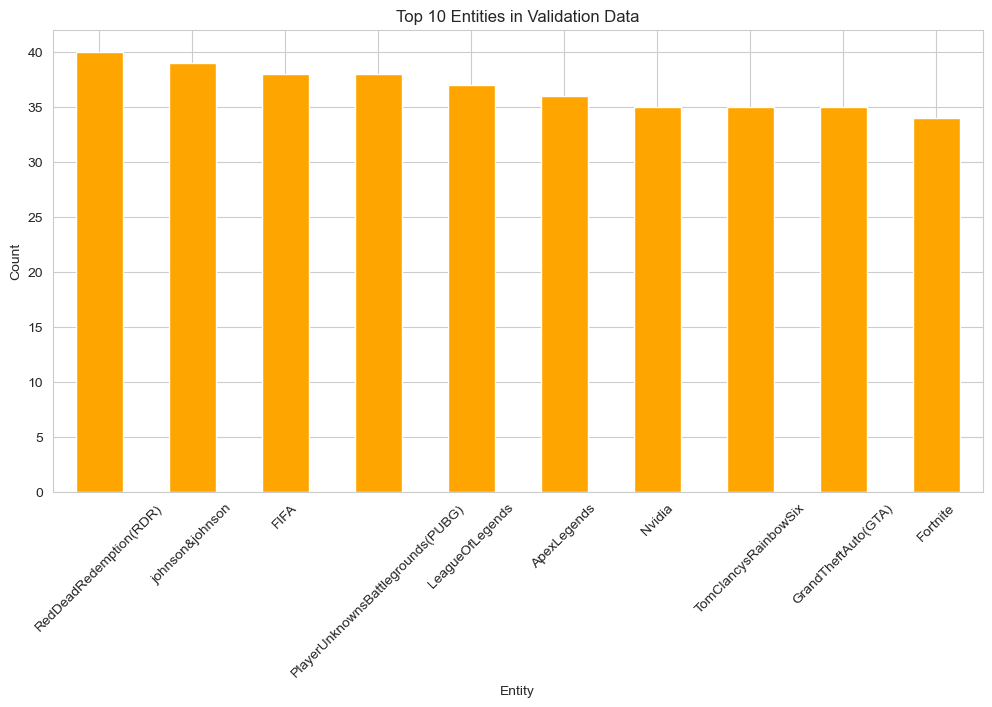

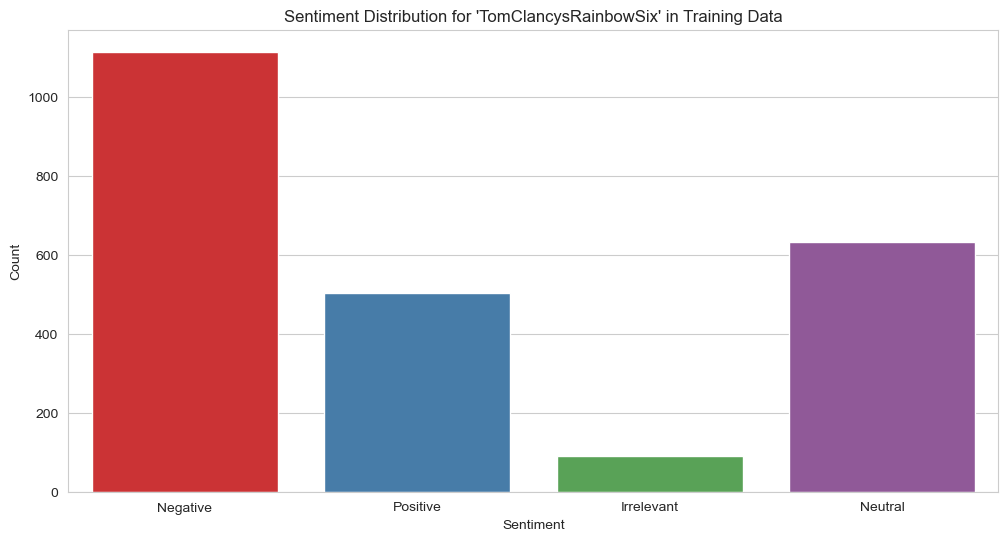

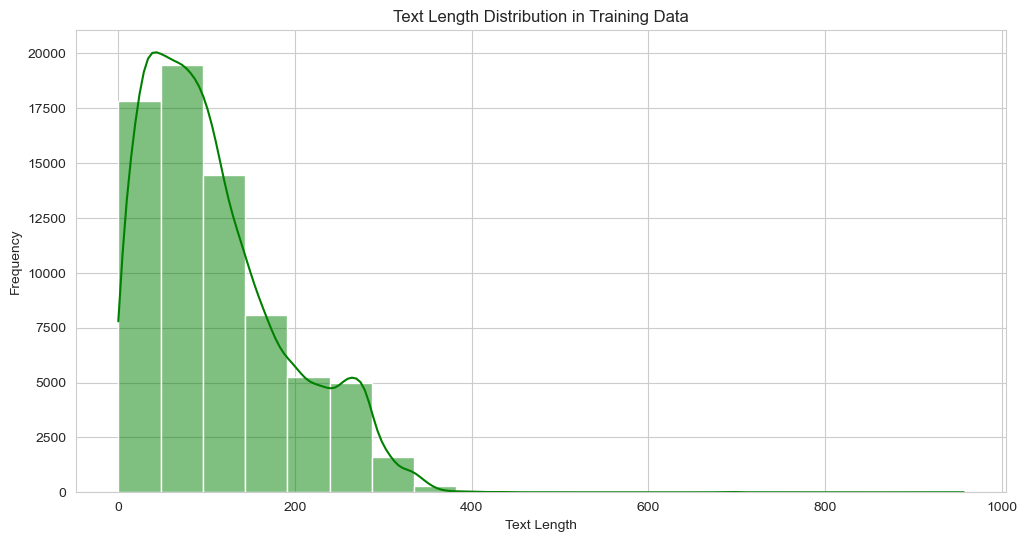

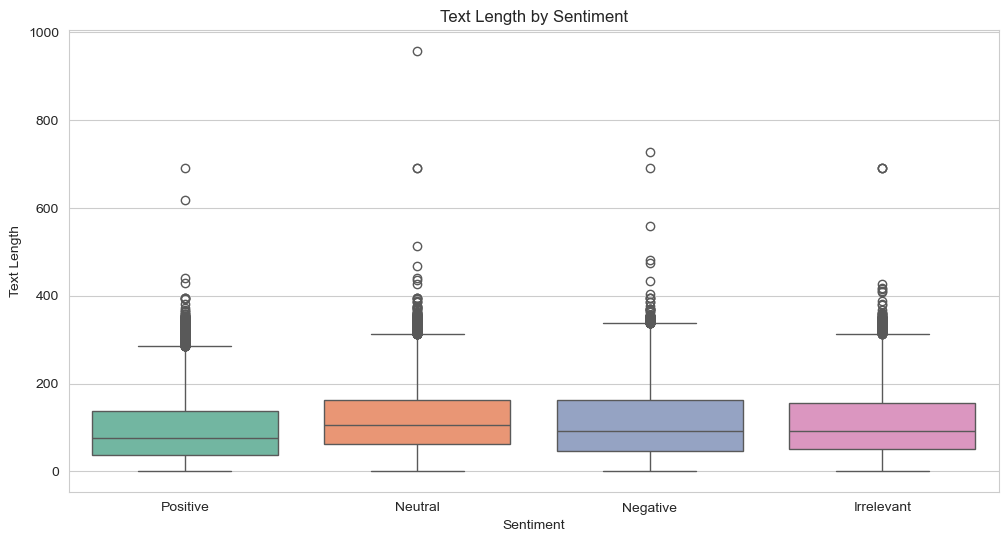

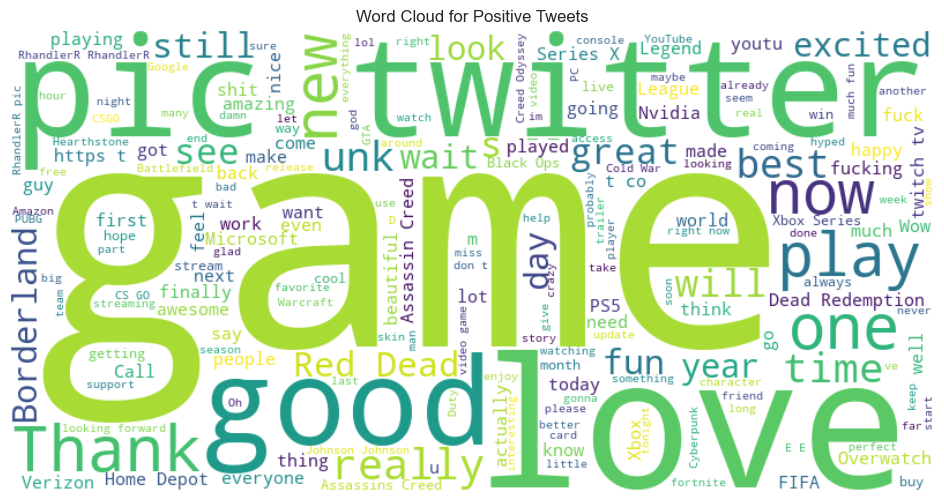

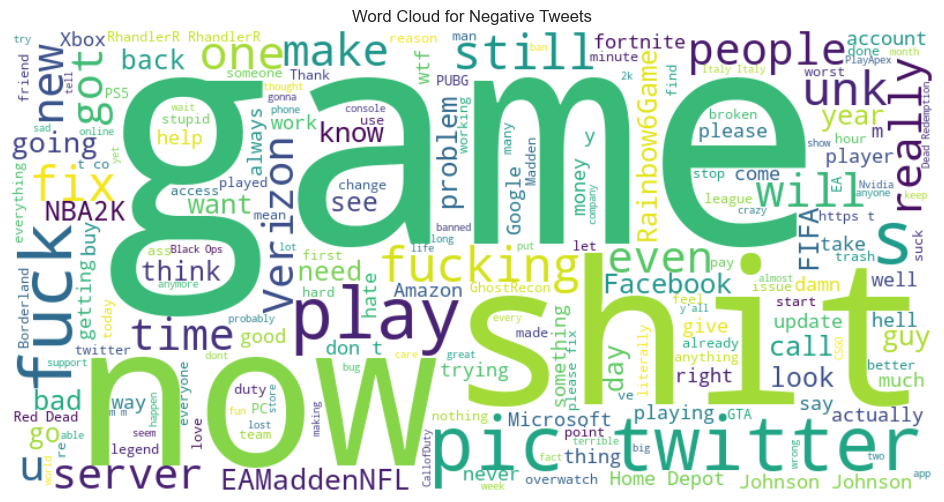

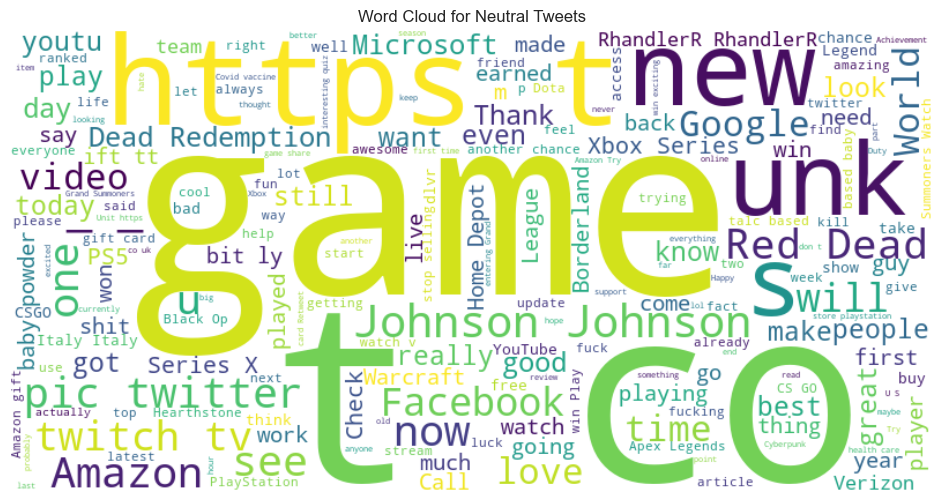

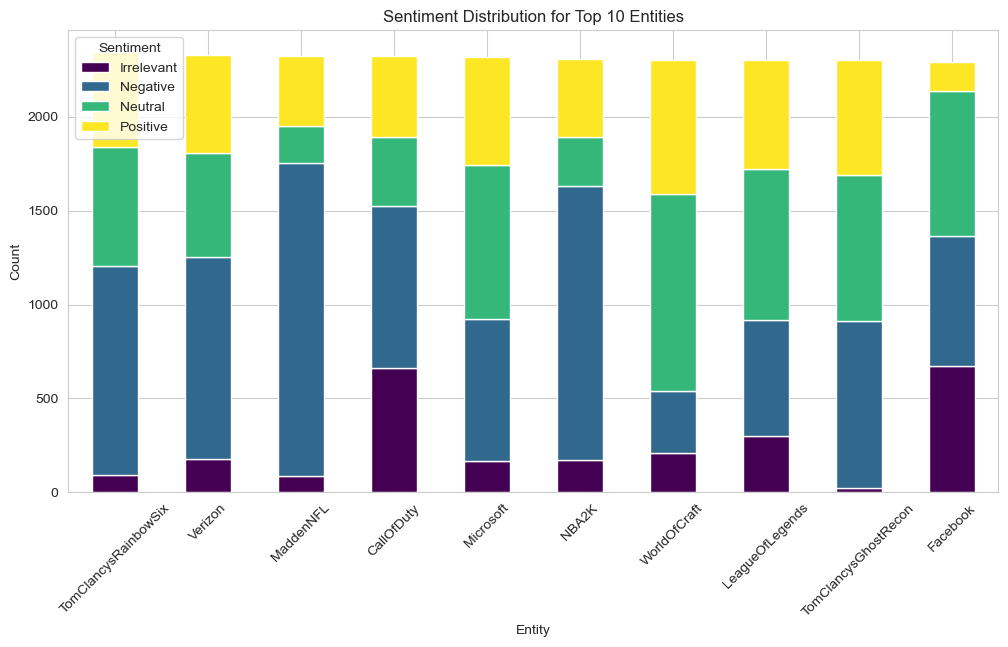

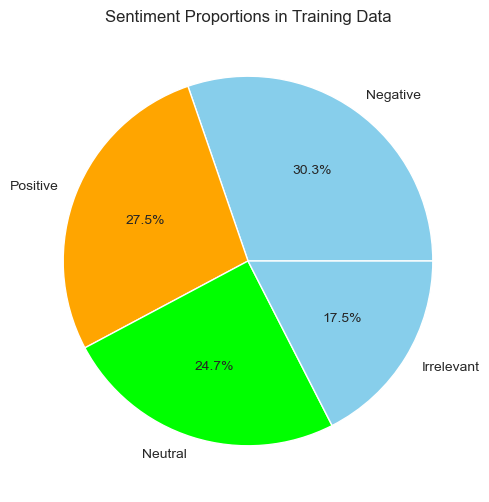

In [3]:
# EDA NOTEBOOK CODE FOR TWITTER SENTIMENT ANALYSIS DATASET

# 1. Import Libraries and Load Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# For better plot visuals
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

# Load datasets
file_path_train = 'archive/twitter_training.csv'
file_path_val = 'archive/twitter_validation.csv'

data_train = pd.read_csv(file_path_train)
data_val = pd.read_csv(file_path_val)

# 2. Inspect Data
# Shape and basic info
print("Training Dataset Shape:", data_train.shape)
print("Validation Dataset Shape:", data_val.shape)

print("\nTraining Dataset Info:")
print(data_train.info())

print("\nValidation Dataset Info:")
print(data_val.info())

print("\nPreview of Training Dataset:")
print(data_train.head())

print("\nPreview of Validation Dataset:")
print(data_val.head())

# 3. Check for Missing Values
print("\nMissing Values in Training Data:")
print(data_train.isnull().sum())

print("\nMissing Values in Validation Data:")
print(data_val.isnull().sum())

# 4. Basic Descriptive Statistics
print("\nDescriptive Statistics (Training):")
print(data_train.describe())

print("\nDescriptive Statistics (Validation):")
print(data_val.describe())

# 5. Data Cleaning
# Renaming columns for better readability
data_train.columns = ['ID', 'Entity', 'Sentiment', 'Text']
data_val.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Handle duplicates
data_train.drop_duplicates(inplace=True)
data_val.drop_duplicates(inplace=True)

# 6. Target Variable Analysis (Sentiment)
# Plot 1: Distribution of Sentiments in Training Data
sns.countplot(x='Sentiment', data=data_train, palette='Set2')
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Plot 2: Sentiment Distribution in Validation Data
sns.countplot(x='Sentiment', data=data_val, palette='Set3')
plt.title("Sentiment Distribution in Validation Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 7. Entity Analysis
# Top 10 entities in training and validation datasets
top_entities_train = data_train['Entity'].value_counts().head(10)
top_entities_val = data_val['Entity'].value_counts().head(10)

# Plot 3: Top Entities in Training Data
top_entities_train.plot(kind='bar', color='skyblue')
plt.title("Top 10 Entities in Training Data")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot 4: Top Entities in Validation Data
top_entities_val.plot(kind='bar', color='orange')
plt.title("Top 10 Entities in Validation Data")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 8. Sentiment Distribution per Entity
# Plot 5: Sentiment distribution for top entity in training data
top_entity = top_entities_train.index[0]
sns.countplot(x='Sentiment', data=data_train[data_train['Entity'] == top_entity], palette='Set1')
plt.title(f"Sentiment Distribution for '{top_entity}' in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 9. Text Length Analysis
# Replace missing values with empty strings before calculating length
data_train['Text'] = data_train['Text'].fillna('')
data_val['Text'] = data_val['Text'].fillna('')
data_train['Text_Length'] = data_train['Text'].apply(len)
data_val['Text_Length'] = data_val['Text'].apply(len)

# Plot 6: Distribution of Text Length in Training Data
sns.histplot(data_train['Text_Length'], bins=20, kde=True, color='green')
plt.title("Text Length Distribution in Training Data")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Plot 7: Text Length vs. Sentiment
sns.boxplot(x='Sentiment', y='Text_Length', data=data_train, palette='Set2')
plt.title("Text Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Text Length")
plt.show()

# 10. Word Frequency Analysis
from wordcloud import WordCloud

# Generate word clouds for Positive, Negative, and Neutral tweets
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(data_train[data_train['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot 8: Word Cloud for Sentiment
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()

# 11. Entity-Sentiment Trends
# Pivot table for Sentiment per Entity
entity_sentiment = data_train.pivot_table(index='Entity', columns='Sentiment', aggfunc='size', fill_value=0)
entity_sentiment['Total'] = entity_sentiment.sum(axis=1)
top_entities_sentiment = entity_sentiment.sort_values(by='Total', ascending=False).head(10)

# Plot 9: Stacked bar chart of Sentiment per Entity
top_entities_sentiment.drop(columns='Total').plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Sentiment Distribution for Top 10 Entities")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 12. Sentiment Proportions
# Plot 10: Pie Chart of Sentiment Proportions in Training Data
sentiment_proportions = data_train['Sentiment'].value_counts(normalize=True)
sentiment_proportions.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'lime'])
plt.title("Sentiment Proportions in Training Data")
plt.ylabel("")
plt.show()

